<style type="text/css">
.tf  {border-collapse:collapse;border-spacing:0;width:100%}
.tf td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tf th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tf .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tf">
<thead>
  <tr>
    <th class="tg-0pky col1">Name</th>
    <th class="tg-0pky col2">Pranay Singhvi</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">UID No.</td>
    <td class="tg-0pky col2">2021300108</td>
  </tr>
</tbody>
</table>

## <p style="text-align:center;font-weight:500;">Experiment 9</p>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../1_/Honour.jpeg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      <strong>Sentiment Analysis on Social Media Data</strong>
      <br>
      1. Select one of the social media channels you would like to analyze the data of - Twitter, Instagram, Reddit, YouTube
      <br>
      2. Select value/s for relevant attributes like  'author', 'topic', 'mention', #tag', 'country' etc. to narrow down the scope of what you would like to analyze.
      <br>
      3. Fetch the narrowed down data across a specific time window using python libraries. This time-window would allow to compare and contrast sentiments across different times and for different events that occur during the time-window.
      <br>
      4. Process the text and do sentiment analysis on it using relevant libraries (Twitter lexicon would require a more specialized library)
      <br>
      5. Plot the results and state your analysis of the results.
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">CASE STUDY</td>
    <td class="tg-0pky col2">
      <p style="font-size:50px; font-family:Times New Roman; text-align:center">"The Tesla Stock"</p>
      <p style="font-size:20px; font-family:Times New Roman; text-align:center">Elon Musk</p>    
      <a href="https://www.tesla.com/">Tesla</a>
      <p> Tesla is an American company revolutionizing the automotive industry with its electric vehicles known for long range, sleek designs, and cutting-edge technology. Beyond cars, Tesla also produces innovative energy solutions like solar panels and home battery storage systems, all with the mission of accelerating the world's shift to sustainable energy.</p>
      <br>
      <br>
      <strong>Datasets:</strong>
      <br>
      <a href="https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021">Tesla Data 2014-2021</a>
      <br>
      <a href="https://www.kaggle.com/datasets/hisanai/elon-musk-tweets-5-years">Elon Musk Tweets 2017-2022</a>
      <br>
    </td>
  </tr>
</tbody>
</table> 

### 1. Importing Libraries & Datasets

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
from textblob import TextBlob
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# read csv file
df_doge = pd.read_csv("TSLA.csv")
df1 = pd.read_csv('Elon 2017-2018.csv')
df2 = pd.read_csv('Elon 2018-2019.csv')
df3 = pd.read_csv('Elon 2019-2020.csv')
df4 = pd.read_csv('Elon 2020-2021.csv')
df5 = pd.read_csv('Elon 2021-2022.csv')

In [67]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


### 2. Preprocessing the Data

In [68]:
df_doge = df_doge.drop(columns=["Adj Close"])  # identical with column 'Close'
df_doge["Date"] = pd.to_datetime(df_doge["Date"])

df_doge["Year"] = df_doge["Date"].dt.year
df_doge["Month_Num"] = df_doge["Date"].dt.month
df_doge["Month"] = df_doge["Month_Num"].apply(lambda x: calendar.month_abbr[x])

df_doge["YYYYMM"] = pd.to_datetime(df_doge["Date"], format="%Y%m", errors="coerce")
df_doge["YYYYMM"] = pd.to_datetime(df_doge["Date"]).dt.strftime("%Y%m")

df_doge["Close_log"] = np.log(df_doge["Close"])
df_doge["Return"] = df_doge["Close"] / df_doge["Open"][0] - 1

In [69]:
# combine all dataframes
df = pd.concat([df1, df2, df3, df4, df5])

# find tweets which contain 'doge'
df = df[df["Tweet"].str.contains("tesla", case=False)]
df = df.reset_index(drop=True)
df = df[["Date", "Tweet"]]
df["YYYY"] = pd.to_datetime(df["Date"], format="%Y", errors="coerce")
df["YYYY"] = pd.to_datetime(df["Date"]).dt.strftime("%Y")
df.to_csv("Elon_Tsla.csv", index=False)

In [70]:
df = pd.read_csv("Elon_Tsla.csv")
print(df.shape[0], "tweets found containing 'doge'")
df.head()

2469 tweets found containing 'doge'


,Date,Tweet,YYYY
0,2017-12-27 00:32:57+00:00,@neilsiegel @Tesla Coming very soon,2017
1,2017-12-26 18:57:03+00:00,@Jason @Tesla Sure,2017
2,2017-12-26 17:46:29+00:00,Wanted again to send a note of deep gratitude ...,2017
3,2017-12-23 23:57:50+00:00,"When you get the new Tesla software update, go...",2017
4,2017-12-21 15:34:15+00:00,Glad to see that Tesla owners are having a goo...,2017


<div style="page-break-before: always;"></div>

It was confirmed that the price and sales volumes of Tesla cars have risen significantly from 2010. This is due to the fact that Elon Musk has been promoting Tesla heavily on social media. The following graph shows the price and sales volume of Tesla cars from 2014 to 2021.

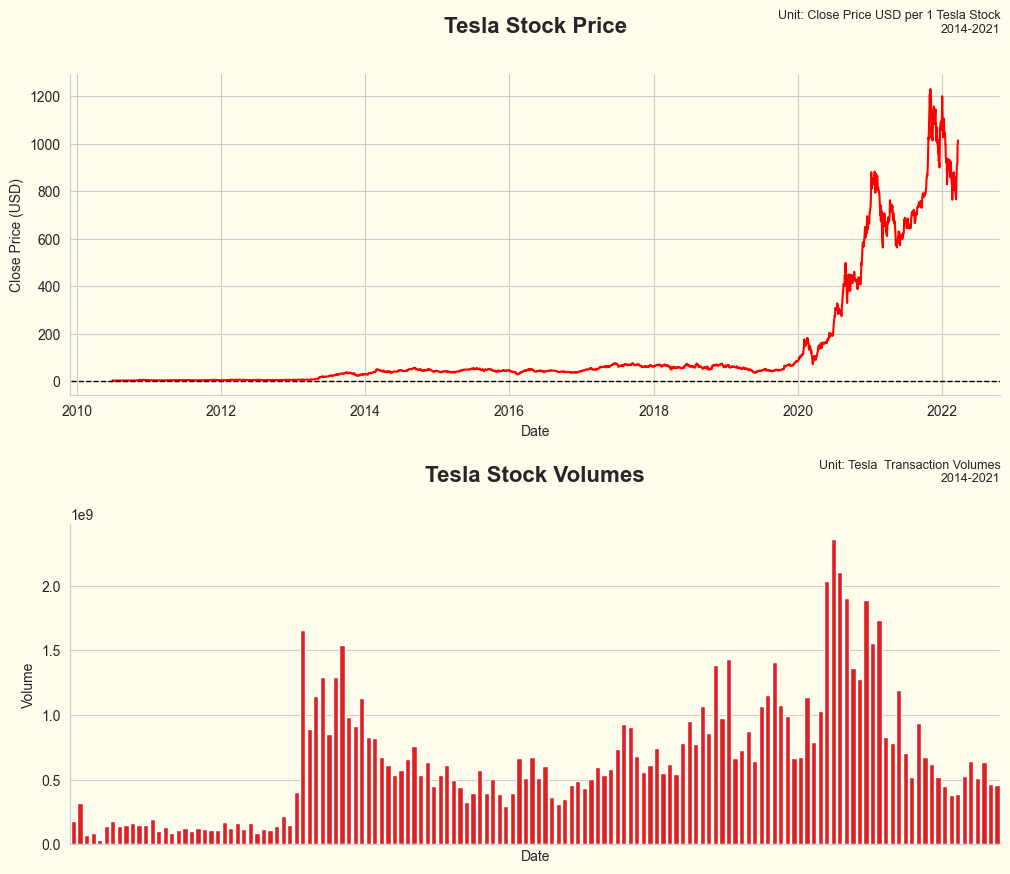

In [71]:
df_hm = pd.pivot_table(df_doge, values="Volume", index=["Year", "Month_Num"], aggfunc=np.sum)
df_hm.reset_index(level=0, inplace=True)
df_hm.reset_index(level=0, inplace=True)
df_hm["Date"] = pd.to_datetime(
    (df_hm.Year * 100 + df_hm.Month_Num).apply(str), format="%Y%m"
).dt.strftime("%Y%m")
df_hm["Volume_log"] = np.log(df_hm["Volume"])

fig = plt.figure(figsize=(12, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
fig.patch.set_facecolor("#FFFCEC")
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(data=df_doge, x="Date", y="Close", color="red")
ax1.patch.set_facecolor("#FFFCEC")
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines["right"].set_visible(False)
ax1 = plt.gca().spines["top"].set_visible(False)
ax1 = plt.gca().spines["left"].set_visible(True)
ax1 = plt.gca().spines["bottom"].set_visible(True)

ax1 = plt.ylabel("Close Price (USD)")
ax1 = plt.axhline(0, 8, 0, color="black", linestyle="--", linewidth="1")
ax1 = plt.title(
    "Unit: Close Price USD per 1 Tesla Stock\n2014-2021", fontsize=9, loc="right"
)
ax1 = plt.title(
    "Tesla Stock Price", fontsize=16, fontweight="heavy", loc="center", pad=30
)

ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(x="Date", y="Volume", data=df_hm, color="red")
ax2.patch.set_facecolor("#FFFCEC")
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines["right"].set_visible(False)
ax2 = plt.gca().spines["top"].set_visible(False)
ax2 = plt.gca().spines["left"].set_visible(True)
ax2 = plt.gca().spines["bottom"].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.title(
    "Unit: Tesla  Transaction Volumes\n2014-2021", fontsize=9, loc="right"
)
ax2 = plt.title(
    "Tesla Stock Volumes", fontsize=16, fontweight="heavy", loc="center", pad=30
)

I analyzed the trend more closely by taking the natural logarithm of the price and volume of Tesla Stock Price. The following graph shows the price and volume of Tesla Stock from 2014 to 2021.
In this case, it was confirmed that **there was a significant price increase in 2017, although not as much as the increase in 2021.**

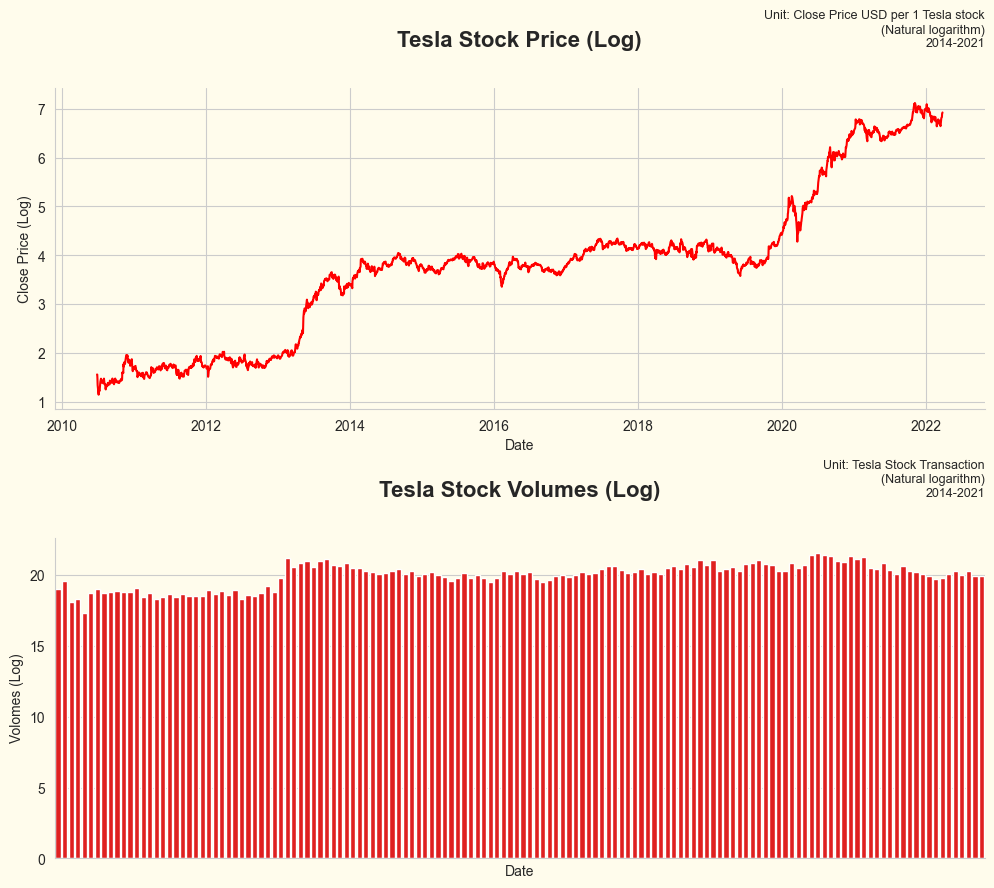

In [72]:
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
fig.patch.set_facecolor("#FFFCEC")
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(data=df_doge, x="Date", y="Close_log", color="red")
ax1.patch.set_facecolor("#FFFCEC")
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines["right"].set_visible(False)
ax1 = plt.gca().spines["top"].set_visible(False)
ax1 = plt.gca().spines["left"].set_visible(True)
ax1 = plt.gca().spines["bottom"].set_visible(True)

ax1 = plt.ylabel("Close Price (Log)")
ax1 = plt.annotate(
    "1st Boom Up",
    xy=(pd.to_datetime("2017-02-25"), -8.3),
    xytext=(pd.to_datetime("2016-03-10"), -4),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", facecolor="black"),
)
ax1 = plt.annotate(
    "2nd Boom Up",
    xy=(pd.to_datetime("2020-10-25"), -5.8),
    xytext=(pd.to_datetime("2019-09-10"), -2),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", facecolor="black"),
)

ax1 = plt.title(
    "Unit: Close Price USD per 1 Tesla stock\n(Natural logarithm)\n2014-2021",
    fontsize=9,
    loc="right",
)
ax1 = plt.title(
    "Tesla Stock Price (Log)", fontsize=16, fontweight="heavy", loc="center", pad=30
)
# semi-colon for hide text before graph output
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(x="Date", y="Volume_log", data=df_hm, color="red")
ax2.patch.set_facecolor("#FFFCEC")
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines["right"].set_visible(False)
ax2 = plt.gca().spines["top"].set_visible(False)
ax2 = plt.gca().spines["left"].set_visible(True)
ax2 = plt.gca().spines["bottom"].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.ylabel("Volomes (Log)")

ax2 = plt.title(
    "Unit: Tesla Stock Transaction\n(Natural logarithm)\n2014-2021",
    fontsize=9,
    loc="right",
)
ax2 = plt.title(
    "Tesla Stock Volumes (Log)", fontsize=16, fontweight="heavy", loc="center", pad=30
)
# semi-colon for hide text before graph output

<div style="page-break-before: always;"></div>

### 3. Sentiment Analysis of Elon Musk's Tweets on Dogecoin

In [73]:
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "pos"
    elif analysis.sentiment.polarity == 0:
        return "neu"
    else:
        return "neg"

In [74]:
df["sentiment"] = df["Tweet"].apply(get_sentiment)
df.to_csv("Elon_Tsla.csv", index=False)
df = pd.read_csv("Elon_Tsla.csv")
df.head()

,Date,Tweet,YYYY,sentiment
0,2017-12-27 00:32:57+00:00,@neilsiegel @Tesla Coming very soon,2017,pos
1,2017-12-26 18:57:03+00:00,@Jason @Tesla Sure,2017,pos
2,2017-12-26 17:46:29+00:00,Wanted again to send a note of deep gratitude ...,2017,pos
3,2017-12-23 23:57:50+00:00,"When you get the new Tesla software update, go...",2017,pos
4,2017-12-21 15:34:15+00:00,Glad to see that Tesla owners are having a goo...,2017,pos


The sentiment analysis of Elon Musk's tweets on Tesla was conducted using the **TextBlob** library. The following graph shows the sentiment of Elon Musk's tweets on Tesla from 2017 to 2022.   
**His tweets were mostly positive, or neutral** but these tweets had a **significant impact on the price** and volume of Tesla.

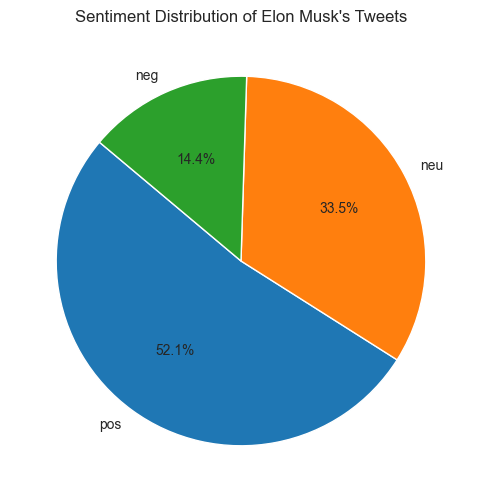

In [75]:
# Sentiment distribution
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6, 6))
pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Distribution of Elon Musk's Tweets")
plt.show()

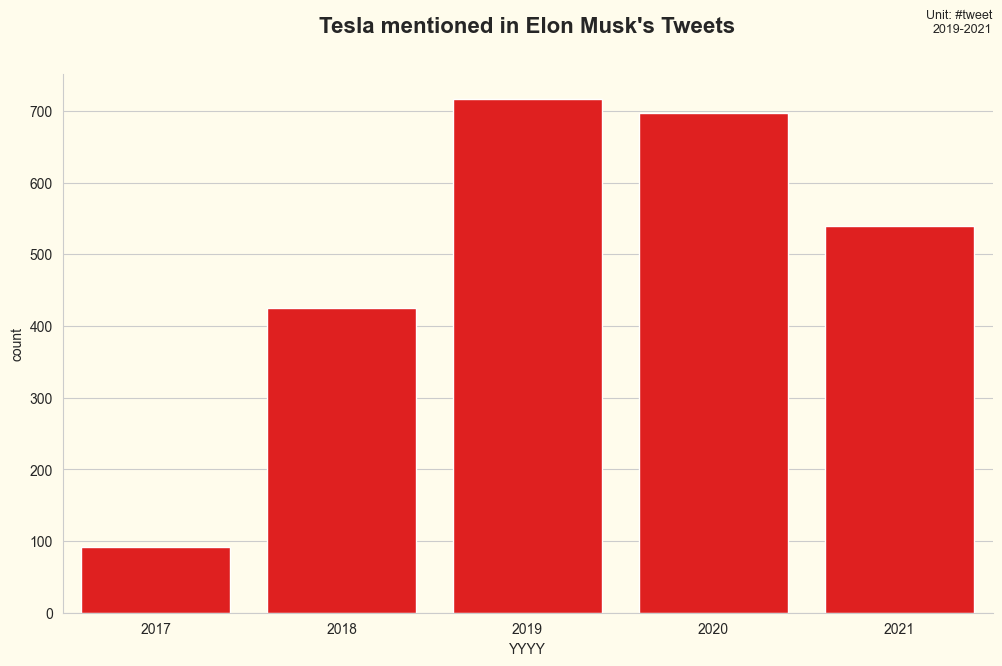

In [76]:
fig = plt.figure(figsize=(12, 7))
fig.patch.set_facecolor("#FFFCEC")
fig.patch.set_alpha(1.0)

ax2 = sns.countplot(x="YYYY", data=df, color="red")
ax2.patch.set_facecolor("#FFFCEC")
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines["right"].set_visible(False)
ax2 = plt.gca().spines["top"].set_visible(False)
ax2 = plt.gca().spines["left"].set_visible(True)
ax2 = plt.gca().spines["bottom"].set_visible(True)

ax2 = plt.title("Unit: #tweet\n2019-2021", fontsize=9, loc="right")
ax2 = plt.title(
    "Tesla mentioned in Elon Musk's Tweets",
    fontsize=16,
    fontweight="heavy",
    loc="center",
    pad=30,
)

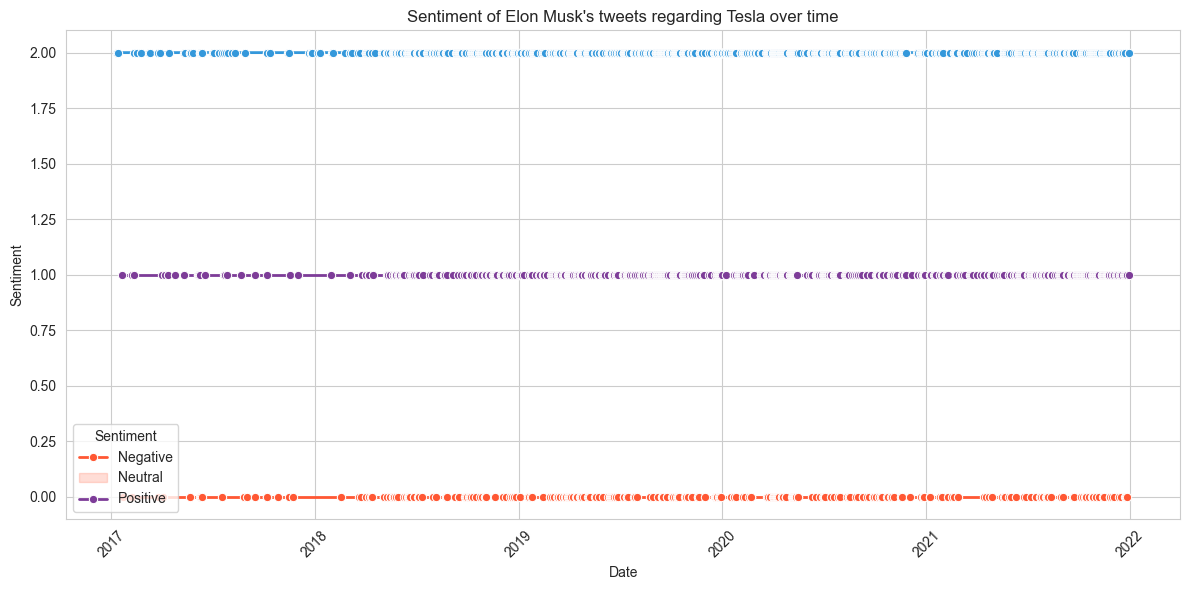

In [77]:
# Map sentiment labels to numeric values for legend
sentiment_mapping = {"neg": 0, "neu": 1, "pos": 2}
df["sentiment_numeric"] = df["sentiment"].map(sentiment_mapping)
df["Date"] = pd.to_datetime(df["Date"])

# Plot the sentiment of Elon Musk's tweets regarding Dogecoin over time
sns.set_style("whitegrid")
custom_palette = {0: "#FF5733", 1: "#7D3C98", 2: "#3498DB"}

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Date",
    y="sentiment_numeric",
    marker="o",
    hue="sentiment_numeric",
    palette=custom_palette,
    linewidth=2,
)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.title("Sentiment of Elon Musk's tweets regarding Tesla over time")
plt.xticks(rotation=45)
plt.legend(["Negative", "Neutral", "Positive"], title="Sentiment")
plt.tight_layout()
plt.show()

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">In this experiment we learned how to perform sentiment analysis on social media data. We analyzed the trend of Tesla Stock Price and sentiment of Elon Musk's tweets on Tesla. We also learned how to fetch data from Twitter and perform sentiment analysis on it.
    </td>
  </tr>
</tbody>
</table> 